In [96]:
# 라이브러리가 없다면 다운로드, 있다면 코드 건너뛰기
pip install pandas
pip install matplotlib
pip install konlpy
pip install tqdm
pip install tensorflow

SyntaxError: invalid syntax (<ipython-input-96-63d32839bb0a>, line 2)

In [ ]:
# 라이브러리가 없다면 다운로드, 있다면 코드 건너뛰기
pip install sklearn

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [422]:
# train_data = pd.read_table('ratings_train.txt')
# test_data = pd.read_table('ratings_test.txt')
total_data = pd.read_table('5차년도_2차(긍정부정분류).txt')

train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 7237
테스트용 리뷰의 개수 : 2413


In [423]:
print('훈련용 리뷰 개수 : ', len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 :  7237


In [424]:
train_data[:5] # 상위 5개 출력

,id,document,label
433,5f5b5c552e23c7161acccefc,눈을 떠보니 밖에 온통 물 밖에 없네. 어쩌지?,0
5192,5f8aef319e04b149046cd27f,나 프로젝트 끝났다.,1
6475,5fb380dde3dcec421f83587c,갇혔다고. 갇혔어.,0
8770,5fbc9c17576e9378b67aceec,내가 평소에 갖고싶었던 거야.,1
104,5f425cd79dd513131eacf01c,내 좋아하는 인플루언서가 파격 이벤트를 하더라고. 그래서 그냥 한 번 신청해봤지.,1


In [682]:
print('테스트용 리뷰 개수 : ', len(test_data)) # 테스트용 리뷰 개수 출력

테스트용 리뷰 개수 :  2413


In [683]:
test_data[:5]

,id,document,label
3773,5f85c32ed338b948c4e69654,달리는 운동을 너무나 좋아해서 매번 열리고 있는 마라톤 대회에 출전하고 있어,1
4053,5f8c5032111dfd48d40fe982,저런 놈 욕을 해줘야 돼 욕 처먹고 싶어서 저러니깐,0
4165,5f8ed249f8fac448cc0a7b1c,내가 마라톤 대회에 출전했는데 예전에 내 기록을 훨씬 갱신했어,1
3424,5f7152f3111dfd48d40fd46d,달리는 동안에는 너무 힘들었는데 결승선을 통과한 순간 기분이 엄청 좋았어,1
5391,5f8f6948f8fac448cc0a7c20,알았어 여행도 좀 다녀볼게,1


In [427]:
# document 열과 label 열의 중복을 제외한 값의 개수
train_data['document'].nunique(), train_data['label'].nunique()

(7237, 2)

In [428]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

C:\Users\ssu\.conda\envs\hate_speech\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [429]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 7237


<AxesSubplot:>

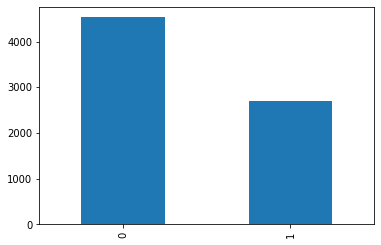

In [684]:
train_data['label'].value_counts().plot(kind = 'bar')

In [431]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   4531
1      1   2706


In [432]:
# 리뷰 중에 Null 값을 가진 샘플이 있는지 확인합니다.
print(train_data.isnull().values.any())

False


In [433]:
# 어떤 열에 존재하는지 확인해봅시다.
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [434]:
# Null 값을 가진 샘플이 어느 인덱스의 위치에 존재하는지 한 번 출력해봅시다.
train_data.loc[train_data.document.isnull()]

,id,document,label


In [435]:
# Null 값을 가진 샘플을 제거하겠습니다.
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [436]:
# 다시 샘플의 개수를 출력하여 1개의 샘플이 제거되었는지 확인해봅시다.
print(len(train_data))

7237


In [437]:
#알파벳과 공백을 제외하고 모두 제거
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


In [438]:
 # 한글과 공백을 제외하고 모두 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

,id,document,label
433,5f5b5c552e23c7161acccefc,눈을 떠보니 밖에 온통 물 밖에 없네 어쩌지,0
5192,5f8aef319e04b149046cd27f,나 프로젝트 끝났다,1
6475,5fb380dde3dcec421f83587c,갇혔다고 갇혔어,0
8770,5fbc9c17576e9378b67aceec,내가 평소에 갖고싶었던 거야,1
104,5f425cd79dd513131eacf01c,내 좋아하는 인플루언서가 파격 이벤트를 하더라고 그래서 그냥 한 번 신청해봤지,1


In [439]:
# 한글이 없는 리뷰였다면 더 이상 아무런 값도 없는 빈(empty) 값이 되었을 것입니다. 
# train_data에 공백(whitespace)만 있거나 빈 값을 가진 행이 있다면 
# Null 값으로 변경하도록 하고, Null 값이 존재하는지 확인해보겠습니다.
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [440]:
# Null 값이 있는 행을 5개만 출력
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
4834,5f8318a7d338b948c4e6927e,NaN,0


In [441]:
# Null 샘플들은 레이블이 긍정일 수도 있고, 부정일 수도 있습니다. 아무런 의미도 없는 데이터므로 제거
train_data = train_data.dropna(how = 'any')
print(len(train_data))

7236


In [442]:
# 테스트 데이터에 앞서 진행한 전처리 과정을 동일하게 진행합니다.
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 2413


C:\Users\ssu\.conda\envs\hate_speech\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ssu\.conda\envs\hate_speech\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ssu\.conda\envs\hate_speech\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [443]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [444]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [685]:
# train_data에 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 X_train에 저장
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 7236/7236 [00:14<00:00, 509.27it/s]


In [686]:
print(X_train[:3])

[['눈', '을', '떠보다', '밖에', '온통', '물', '밖에', '없다', '어쩌지'], ['나', '프로젝트', '끝나다'], ['갇히다', '갇히다']]


In [687]:
# 형태소 토큰화가 진행된 것을 볼 수 있습니다. 
# 테스트 데이터에 대해서도 동일하게 토큰화를 해줍니다.
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 2413/2413 [00:04<00:00, 535.61it/s]


In [688]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 
# 테스트 데이터에 정수 인코딩을 수행해야 합니다. 
# 우선, 훈련 데이터에 대해서 단어 집합(vocaburary)을 만들어봅시다.
tokenizer = Tokenizer()
print(len(X_train))
tokenizer.fit_on_texts(X_train)
print(len(X_train))
print(X_train)

7236
7236
[['눈', '을', '떠보다', '밖에', '온통', '물', '밖에', '없다', '어쩌지'], ['나', '프로젝트', '끝나다'], ['갇히다', '갇히다'], ['내', '평소', '갖다', '거야'], ['내', '좋아하다', '인', '플루', '언', '서', '파격', '이벤트', '그래서', '그냥', '번', '신청', '해봤다'], ['그러니까', '얼른', '버리다', '겠다', '냄새', '너무', '나다', '있다'], ['그렇다'], ['유튜버들', '사람', '을', '속', '이고', '광고', '안', '광고', '물건'], ['자고', '일어나다', '우리', '집', '빼다', '주변', '다', '물바다', '되어다'], ['그런데', '요즘', '날씨', '너무', '추다'], ['쉬다', '못', '하고', '얼마나', '열심히', '완전하다', '끝나다'], ['드디어', '노트북', '오다', '빨리', '뜯다', '보다'], ['아니다', '요즘', '다', '왜', '이르다', '거야', '난', '정말', '이해', '안', '가다'], ['집', '안', '나', '혼자', '갇히다', '되다', '너무나', '무섭다', '두렵다'], ['장마', '로', '인하다', '비', '많이', '내리다', '우리', '동네', '고립', '돼다', '그래서', '갇히다', '되어다'], ['스트레스', '해소', '나', '가다'], ['지금', '당장', '사진', '을', '메세지', '로', '첨부', '짜장면', '집', '전화하다'], ['아', '그니까', '빨리', '버리다', '걸', '그렇다', '아', '진짜', '역겹다', '아주', '그냥'], ['나', '엘리베이터', '갇히다', '어떡하다'], ['내', '음식물', '쓰레기', '그', '곳', '버리다', '버리다'], ['너무', '힘들다', '그런데', '뛰다', '나서다', '너무', '상쾌하다', '기분', 

In [563]:
# 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었습니다. 
# 이는 tokenizer.word_index를 출력하여 확인 가능합니다.
print(tokenizer.word_index)

{'나': 1, '있다': 2, '그렇다': 3, '너무': 4, '을': 5, '내': 6, '좋다': 7, '것': 8, '같다': 9, '안': 10, '집': 11, '돼다': 12, '거': 13, '아니다': 14, '없다': 15, '보다': 16, '그': 17, '곰팡이': 18, '기분': 19, '에서': 20, '버리다': 21, '아': 22, '냄새': 23, '만': 24, '한테': 25, '오다': 26, '되다': 27, '들다': 28, '못': 29, '다': 30, '지금': 31, '당첨': 32, '않다': 33, '해주다': 34, '알다': 35, '음악': 36, '정말': 37, '싶다': 38, '거야': 39, '끝나다': 40, '청소': 41, '왜': 42, '응': 43, '나다': 44, '무섭다': 45, '나오다': 46, '어': 47, '친구': 48, '생각': 49, '비': 50, '진짜': 51, '게': 52, '새끼': 53, '맞다': 54, '갇히다': 55, '이야': 56, '말': 57, '힘들다': 58, '일': 59, '마라톤': 60, '야': 61, '혼자': 62, '짜증나다': 63, '이벤트': 64, '나가다': 65, '괜찮다': 66, '너': 67, '어떻다': 68, '향수': 69, '기록': 70, '가다': 71, '서': 72, '많이': 73, '쓰레기': 74, '이다': 75, '수': 76, '벌레': 77, '명': 78, '만나다': 79, '해보다': 80, '자다': 81, '제': 82, '모르다': 83, '여행': 84, '휴가': 85, '받다': 86, '좋아하다': 87, '우리': 88, '화장실': 89, '사진': 90, '더': 91, '대회': 92, '찍다': 93, '고맙다': 94, '그냥': 95, '신나다': 96, '쓰레기통': 97, '엄청': 98, '음식물': 99, '동안': 100, '뭐':

In [689]:
# 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다는 것을 의미합니다. 
# 여기서는 빈도수가 낮은 단어들은 자연어 처리에서 배제하고자 합니다. 
# 등장 빈도수가 3회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해봅시다.
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 2094
등장 빈도가 2번 이하인 희귀 단어의 수: 944
단어 집합에서 희귀 단어의 비율: 45.08118433619867
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.069740079152851


In [690]:
# 등장 빈도수가 2이하인 단어들의 수를 제외한 단어의 개수를 
# 단어 집합의 최대 크기로 제한하겠습니다.

# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
# vocab_size = total_cnt - rare_cnt + 1
print(total_cnt - rare_cnt + 1)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 :',vocab_size)

1151
단어 집합의 크기 : 2095


In [691]:
# 케라스 토크나이저의 인자로 넘겨주고 텍스트 시퀀스를 정수 시퀀스로 변환합니다.
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [692]:
# 정수 인코딩이 진행되었는지 확인하고자 X_train에 대해서 상위 3개의 샘플만 출력합니다.
# 각 샘플 내의 단어들은 각 단어에 대한 정수로 변환된 것을 확인할 수 있습니다. 
# 단어의 개수는 19,416개로 제한되었으므로 0번 단어 ~ 19,415번 단어까지만 사용 중입니다. 
# 0번 단어는 패딩을 위한 토큰임을 상기합시다.
print(X_train[:3])

[[998, 5, 1368, 167, 714, 253, 167, 15, 1369], [1, 120, 40], [55, 55]]


In [693]:
# train_data에서 y_train과 y_test를 별도로 저장해줍니다.

y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [694]:
# 전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 
# 빈도수가 낮은 단어만으로 구성되었던 샘플들은 빈(empty) 샘플이 되었다는 것을 의미합니다. 
# 빈 샘플들은 어떤 레이블이 붙어있던 의미가 없으므로 빈 샘플들을 제거해주는 작업을 하겠습니다. 
# 각 샘플들의 길이를 확인해서 길이가 0인 샘플들의 인덱스를 받아오겠습니다.

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [695]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))
i = random.randrange(0, 2000)
print(X_train[i], len(X_train[i]))


# 문장 길이에 따른 결과(confidence) 예측 정확도 평균
dict_list = {}
for x in X_train:
    dict_list.setdefault(len(x), []).append(x)

# 딕셔너리의 모든 샘플의 길이를 15로 맞춤. max_len = 15 
for x in dict_list:
    dict_list[x] = pad_sequences(dict_list[x], maxlen=max_len)
print(dict_list)

7236
7236
[26, 105, 20, 77, 46] 5
{9: array([[   0,    0,    0, ...,  167,   15, 1369],
       [   0,    0,    0, ...,   10,  180,  999],
       [   0,    0,    0, ...,   30,  320,  110],
       ...,
       [   0,    0,    0, ...,    5,   34,   27],
       [   0,    0,    0, ...,   10,  628,    2],
       [   0,    0,    0, ...,  311,  238,  183]]), 3: array([[   0,    0,    0, ...,    1,  120,   40],
       [   0,    0,    0, ...,  105,   77,   46],
       [   0,    0,    0, ...,  618,  290, 1002],
       ...,
       [   0,    0,    0, ...,   84,  814,    7],
       [   0,    0,    0, ...,    1,  598,    7],
       [   0,    0,    0, ...,   18,  102,   33]]), 2: array([[  0,   0,   0, ...,   0,  55,  55],
       [  0,   0,   0, ...,   0, 185,  15],
       [  0,   0,   0, ...,   0, 119,  80],
       ...,
       [  0,   0,   0, ...,   0,   3,  83],
       [  0,   0,   0, ...,   0,  37,  94],
       [  0,   0,   0, ...,   0,  11,  55]]), 4: array([[  0,   0,   0, ..., 398, 162,  39],
   

C:\Users\ssu\.conda\envs\hate_speech\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 28
리뷰의 평균 길이 : 7.752072968490879


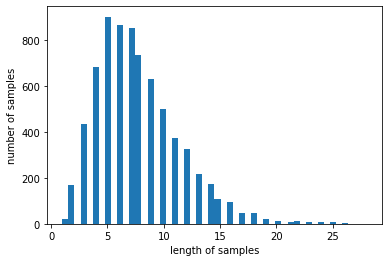

In [571]:
# 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포를 알아보겠습니다.
print('문장의 최대 길이 :',max(len(review) for review in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [572]:
# 가장 긴 리뷰의 길이는 69이며, 그래프를 봤을 때 전체 데이터의 길이 분포는 
# 대체적으로 약 11내외의 길이를 가지는 것을 볼 수 있습니다. 
# 모델이 처리할 수 있도록 X_train과 X_test의 모든 샘플의 길이를 
# 특정 길이로 동일하게 맞춰줄 필요가 있습니다. 특정 길이 변수를 max_len으로 정합니다. 
# 대부분의 리뷰가 내용이 잘리지 않도록 할 수 있는 최적의 max_len의 값은 몇일까요? 
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수를 만듭니다.

def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [573]:
# 분포 그래프를 봤을 때, max_len = 15이 적당할 것 같습니다. 
# 이 값이 얼마나 많은 리뷰 길이를 커버하는지 확인해봅시다.
max_len = 15
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 15 이하인 샘플의 비율: 96.40685461580985


In [574]:
# 전체 훈련 데이터 중 약 96%의 리뷰가 15이하의 길이를 가지는 것을 확인했습니다. 
# 모든 샘플의 길이를 30으로 맞추겠습니다.
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print(len(X_train))
print(len(X_test))

print(X_train[random.randrange(0, 2000)])

7236
2413
[  0   0   0   0   0   0   0   0  47 126  82 791  27  13   9]


In [575]:
# 하이퍼파라미터인 임베딩 벡터의 차원은 100, 은닉 상태의 크기는 128입니다. 
# 모델은 다 대 일 구조의 LSTM을 사용합니다. 
# 해당 모델은 마지막 시점에서 두 개의 선택지 중 하나를 예측하는 
# 이진 분류 문제를 수행하는 모델입니다. 
# 이진 분류 문제의 경우, 출력층에 로지스틱 회귀를 사용해야 하므로 
# 활성화 함수로는 시그모이드 함수를 사용하고, 
# 손실 함수로 크로스 엔트로피 함수를 사용합니다. 
# 하이퍼파라미터인 배치 크기는 64이며, 15 에포크를 수행합니다.

# EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)는 
# 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 
# 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)한다는 의미입니다. 
# ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 
# 이전보다 좋아질 경우에만 모델을 저장합니다. 
# validation_split=0.2을 사용하여 훈련 데이터의 20%를 검증 데이터로 분리해서 사용하고, 
# 검증 데이터를 통해서 훈련이 적절히 되고 있는지 확인합니다. 
# 검증 데이터는 기계가 훈련 데이터에 과적합되고 있지는 않은지 확인하기 위한 용도로 사용됩니다.

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 모델 생성해서 훈련하는 코드
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_common_talk.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
91/91 [==============================] - 2s 11ms/step - loss: 0.3522 - acc: 0.8397 - val_loss: 0.1405 - val_acc: 0.9530

Epoch 00001: val_acc improved from -inf to 0.95304, saving model to best_model_common_talk.h5
Epoch 2/15
91/91 [==============================] - 1s 7ms/step - loss: 0.1271 - acc: 0.9506 - val_loss: 0.1029 - val_acc: 0.9586

Epoch 00002: val_acc improved from 0.95304 to 0.95856, saving model to best_model_common_talk.h5
Epoch 3/15
91/91 [==============================] - 1s 8ms/step - loss: 0.0941 - acc: 0.9596 - val_loss: 0.0975 - val_acc: 0.9613

Epoch 00003: val_acc improved from 0.95856 to 0.96133, saving model to best_model_common_talk.h5
Epoch 4/15
91/91 [==============================] - 1s 8ms/step - loss: 0.0820 - acc: 0.9667 - val_loss: 0.0898 - val_acc: 0.9662

Epoch 00004: val_acc improved from 0.96133 to 0.96616, saving model to best_model_common_talk.h5
Epoch 5/15
91/91 [==============================] - 1s 8ms/step - loss: 0.0729 - acc: 0.97

In [673]:
# 저자의 경우 조기 종료 조건에 따라서 9 에포크에서 훈련이 멈췄습니다. 
# 훈련이 다 되었다면 테스트 데이터에 대해서 정확도를 측정할 차례입니다. 
# 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'best_model.h5'를 로드합니다.
loaded_model = load_model('best_model_common_talk.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

76/76 [==============================] - 0s 2ms/step - loss: 0.1142 - acc: 0.9577

 테스트 정확도: 0.9577


In [674]:
# 임의의 리뷰에 대해서 예측하는 함수를 만들어보겠습니다. 
# 기본적으로 현재 학습한 model에 새로운 입력에 대해서 예측값을 얻는 것은 
# model.predict()를 사용합니다. 그리고 model.fit()을 할 때와 마찬가지로 
# 새로운 입력에 대해서도 동일한 전처리를 수행 후에 model.predict()의 입력으로 사용해야 합니다.

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    prob = score * 100
    sent = 1
    print("=> {:.2f}% 확률로 혐오 표현이 아닙니다.".format(prob))
  else:
    prob = (1 - score) * 100
    sent = -1
    print("=> {:.2f}% 확률로 혐오 표현입니다.".format(prob))
  
  return (prob, sent)

In [675]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

=> 75.38% 확률로 혐오 표현입니다.


(75.37958025932312, -1)

In [676]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')


=> 75.38% 확률로 혐오 표현입니다.


(75.37958025932312, -1)

In [677]:
sentiment_predict('이딴게 영화냐 ㅉㅉ!!!')

=> 65.96% 확률로 혐오 표현입니다.


(65.96097350120544, -1)

In [678]:
sentiment_predict('감독 뭐하는 놈이냐?')

=> 97.30% 확률로 혐오 표현입니다.


(97.29679822921753, -1)

In [679]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

=> 51.62% 확률로 혐오 표현이 아닙니다.


(51.622891426086426, 1)

In [680]:
sentiment_predict('나도 잘 몰라')

=> 80.46% 확률로 혐오 표현입니다.


(80.46271800994873, -1)

In [681]:
sentiment_predict('그래 잘됐네')

=> 64.71% 확률로 혐오 표현입니다.


(64.71324861049652, -1)

In [659]:
# 대화 데이터 감성분석
# 예측하기 위해서 '5차년도_2차.csv' 데이터 사용했음.
# 데이터가 없다면 아래와 같이 문장을 입력해서 함수 호출하면 됨.
# 예) sentiment_predict('친구들 만날 생각에 기대된다')

import csv
import random

words = [] # 발화문 리스트 변수

with open('5차년도_2차(긍정부정분류).csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for index,col in enumerate(reader): # 발화문 필드(col[1])만 리스트에 저장
        words.append(col[1])

    for i in range(0, 5):
        str = words[random.randrange(0, len(words))] # 무작위로 다섯 문장 감성 분류
        print('\n', str)
        sentiment_predict(str)


 저거는 진중하지 않았어도 전혀.
=> 88.90% 확률로 혐오 표현입니다.

 장마철이라서 습기가 많아져서 매일 청소를 하는데 곰팡이가 안 없어져.
=> 100.00% 확률로 혐오 표현입니다.

 뭐 어때서?
=> 95.24% 확률로 혐오 표현입니다.

 맞아. 오랜시간 연습했던 결실을 거두는 순간이라서 정말 감격적이었어.
=> 100.00% 확률로 혐오 표현이 아닙니다.

 그게 내 마음이 더 편할지 안하는게 마음이 더 편할지 잘 모르겠어. 근데 너무 화나.
=> 100.00% 확률로 혐오 표현이 아닙니다.


In [585]:
sentiment_predict('친구들 만날 생각에 기대된다')

99.14% 확률로 긍정 리뷰입니다.



(99.14499521255493, 1)

In [599]:
# 문장 길이에 따른 결과(confidence) 예측 정확도 평균
# print(dict_list)
all_str = 0
for x in dict_list:
    all_str += len(dict_list[x])

print(all_str)
dict_avg = {}
print(dict_list.keys())

for x in dict_list.keys():
    print(x)

7236
dict_keys([9, 3, 2, 4, 13, 8, 1, 5, 7, 6, 11, 10, 12, 15, 18, 14, 17, 16, 19, 20, 21, 25, 26, 22, 23, 24, 28])
9
3
2
4
13
8
1
5
7
6
11
10
12
15
18
14
17
16
19
20
21
25
26
22
23
24
28


In [473]:

# loaded_models = {}
loaded_lstm = load_model('best_model_common_talk.h5')
loaded_bilstm = load_model('best_model_BiLSTM.h5')


# loaded_models.update({"loaded_lstm" : loaded_lstm})
# loaded_models.update({"loaded_bilstm" : loaded_bilstm})
# print(loaded_models)

In [616]:
acc, length = sent_pred_csv(loaded_lstm, '이번주도 힘들게 보내겠지')
print(acc, length)

encoded :  [128, 58, 384]
0.9297250509262085 3


In [643]:
# 문장 길이에 따른 결과(confidence) 예측 정확도 평균
import csv
dict_list = {}
dict_avg = {}
result = []
# with open('5차년도_2차(긍정부정분류).csv', 'r') as input:
with open('5차년도_2차(긍정부정분류).csv', 'r') as input, \
    open('result_lstm.csv', 'w', encoding='utf-8', newline='') as output:
    
    reader = csv.reader(input)
    next(reader)
    wr = csv.writer(output)
    wr.writerow(['length of sentence', 'avg of accuracy'])
    for index,col in enumerate(reader): # 발화문 필드(col[1])만 리스트에 저장
        if index > 100:
            break
        str = col[1]
        acc, length = sent_pred_csv(loaded_lstm, str)
        dict_list.setdefault(length, []).append(acc)
    
    for length in dict_list:
        result.append([length, sum(map(abs, map(float, dict_list[length])))/len(dict_list[length])])
    
    list.sort(result)
    print(result)
    wr.writerows(result)
    
        
# print(dict_list)
all_str = 0
for x in dict_list:
    all_str += len(dict_list[x])

print(all_str)


[[4, 0.96967746814092], [5, 0.9987742751836777], [6, 0.9957171189242218], [7, 0.9966903712068286], [8, 0.9824769310896174], [9, 0.9786941587171896], [10, 0.9816712379455567], [11, 0.9973487964105314], [12, 0.9910476510693419], [13, 0.9939103547444574], [14, 0.9995877038345498], [15, 0.991220743098633], [16, 0.9897390450816601], [17, 0.9977971097214322], [18, 0.9995866247358208], [19, 0.9995839595794678], [20, 0.9966624617576599], [24, 0.9993986785411835], [26, 0.9867617785930634]]
101


In [619]:
# 임의의 리뷰에 대해서 예측하는 함수를 만들어보겠습니다. 
# 기본적으로 현재 학습한 model에 새로운 입력에 대해서 예측값을 얻는 것은 
# model.predict()를 사용합니다. 그리고 model.fit()을 할 때와 마찬가지로 
# 새로운 입력에 대해서도 동일한 전처리를 수행 후에 model.predict()의 입력으로 사용해야 합니다.

def sent_pred_csv(model, new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
#   print(encoded)
  length = len(encoded[0])
#   print('encoded : ', encoded[0])
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  if(score > 0.5):
    prob = score
    sent = 1
#     print("=> {:.2f}% 확률로 혐오 표현이 아닙니다.\n".format(prob))
  else:
    prob = (1 - score)
    sent = -1
#     print("=> {:.2f}% 확률로 혐오 표현입니다.\n".format(prob))
  
  return (prob * sent), length # 확률 * {1 | -1}(긍정 | 부정)

In [632]:
# 대화 데이터 감성분석
# 예측하기 위해서 '5차년도_2차.csv' 데이터 사용했음.
# 데이터가 없다면 아래와 같이 문장을 입력해서 함수 호출하면 됨.
# 예) sentiment_predict('친구들 만날 생각에 기대된다')

import csv
import random

words = [] # 발화문 리스트 변수
result = []
with open('5차년도_2차(긍정부정분류).csv', 'r') as input, \
    open('result_lstm.csv', 'w', encoding='utf-8', newline='') as output:
    reader = csv.reader(input)
    next(reader)
    wr = csv.writer(output)
    wr.writerow(['index', 'LSTM'])
    for index,col in enumerate(reader): # 발화문 필드(col[1])만 리스트에 저장
        sentence = col[1]
#         print(type(sentence))
        words.append(sentence)
#         print(index, sentence)
#         print(sentence)
    for i in range(0, 2000):
        idx = random.randrange(0, len(words))
        str = words[idx]
        row = [idx, sent_pred_csv(loaded_lstm, str)]
        result.append(row)
    
    wr.writerows(result)
# print(result)

[[11, (0.9827659130096436, 6)], [4, (0.9999912977218628, 11)], [88, (0.998234748840332, 4)], [86, (-0.9994190037250519, 15)], [52, (0.998234748840332, 4)], [45, (-0.9995798766613007, 11)], [21, (0.9546383619308472, 16)], [37, (0.9969133138656616, 4)], [65, (-0.9998858730759821, 17)], [99, (-0.9998185336589813, 7)], [24, (-0.9985331892967224, 20)], [45, (-0.9995798766613007, 11)], [82, (-0.9999373980899691, 14)], [85, (-0.9999638884946762, 13)], [27, (-0.9998141229152679, 7)], [41, (0.999992847442627, 13)], [30, (-0.999962657209835, 12)], [22, (-0.9999534760790993, 8)], [63, (0.9503506422042847, 9)], [1, (0.9999040365219116, 12)], [48, (-0.9998655617237091, 10)], [51, (-0.9984520375728607, 13)], [28, (-0.9998640716075897, 11)], [70, (-0.9999855215046409, 9)], [13, (-0.9997947514057159, 14)], [82, (-0.9999373980899691, 14)], [46, (-0.9965647757053375, 9)], [96, (-0.9985377490520477, 7)], [24, (-0.9985331892967224, 20)], [98, (-0.9972535967826843, 6)], [6, (0.923201322555542, 9)], [25, (-

In [476]:
words = [ x for x in range(1000)]
print(words[random.randrange(0, len(words))])

539


In [477]:
sent_pred_csv(loaded_lstm, '알바비를 모아서 산 거기 때문에 좋은 건 못 샀어.')

0.9497451782226562

In [478]:
random_index = []
for i in range(2000):
    random_index.append(random.randrange(0, len(words)))
# print(random_index) 
with open('random_index.txt', 'w', encoding='utf-8') as output:
    output.write(random_index)

TypeError: write() argument must be str, not list